Emma Sofia Aparicio Rodriguez - A01666223


---


#**Basic Statistical Data Representation**


---




In [2]:
# To load the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# To load the dataset
datos = pd.read_csv('https://raw.githubusercontent.com/emmasofiaar/arte_analitica/refs/heads/main/survey.csv')
datos.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [11]:
# Shape of the data
print("Shape:", datos.shape)

# Column names and types
print("Info:")
datos.info()

# Check for missing values
print("Missing values:")
print(datos.isnull().sum())

Shape: (1259, 27)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-nul

In [13]:
# Categóricas
categorical_cols = datos.select_dtypes(include=['object']).columns
print("Variables categóricas:", list(categorical_cols))

# Numéricas
numerical_cols = datos.select_dtypes(include=['int64', 'float64']).columns
print("Variables numéricas:", list(numerical_cols))

Variables categóricas: ['Timestamp', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']
Variables numéricas: ['Age']


In [15]:
# Ver nombres de columnas (todas las variables del dataset)
print("Columnas del dataset:")
print(datos.columns)

Columnas del dataset:
Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')


In [26]:
# Mostrar info general
print("\n== Tipos de datos ==")
print(datos.dtypes)

print("\n== Variables y análisis ==")
for col in datos.columns:
    print(f"\nVariable: {col}")
    print(f"Tipo de dato: {datos[col].dtype}")

    if pd.api.types.is_numeric_dtype(datos[col]):
        print("Valores nulos:", datos[col].isnull().sum())
        print("Mínimo:", datos[col].min())
        print("Máximo:", datos[col].max())
        print("Promedio:", datos[col].mean())
    elif pd.api.types.is_datetime64_any_dtype(datos[col]):
        print("Rango de fechas:", datos[col].min(), "→", datos[col].max())
    else:
        print("Valores únicos:", datos[col].nunique())
        print("Categorías:", datos[col].unique()[:10])  # Solo muestra los primeros 10


== Tipos de datos ==
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype:

In [25]:
# mean, median, and std deviation
# Filtrar edades fuera de un rango razonable (por ejemplo, menores de 10 o mayores de 100)
datos_clean = datos[(datos['Age'] >= 10) & (datos['Age'] <= 100)]

# Estadísticas descriptivas después de la limpieza
numerical_cols = datos_clean.select_dtypes(include=['int64', 'float64']).columns
print("== Análisis estadístico de variables numéricas (limpiadas) ==")
print(datos_clean[numerical_cols].describe().T[['mean', '50%', 'std']].rename(columns={"50%": "median"}))


== Análisis estadístico de variables numéricas (limpiadas) ==
          mean  median       std
Age  32.059904    31.0  7.309669


- El promedio (32 años) y la mediana (30 años) están relativamente cercanos.
- Esto indica que la distribución de la edad es ligeramente sesgada a la derecha (hay algunas edades mayores que elevan el promedio).
- La desviación estándar (7.3) sugiere una variabilidad moderada.



---


### **Mental Health in Tech Survey**
This dataset contains results from a survey focused on mental health in the tech workplace. It includes anonymous responses from people working in tech-related jobs, addressing their mental health history, workplace environment, company support, and attitudes toward mental illness.


---



### **Boxplots for Age Distribution by Mental Health Treatment**
We are examining the distribution of ages for people who have received mental health treatment versus those who have not.

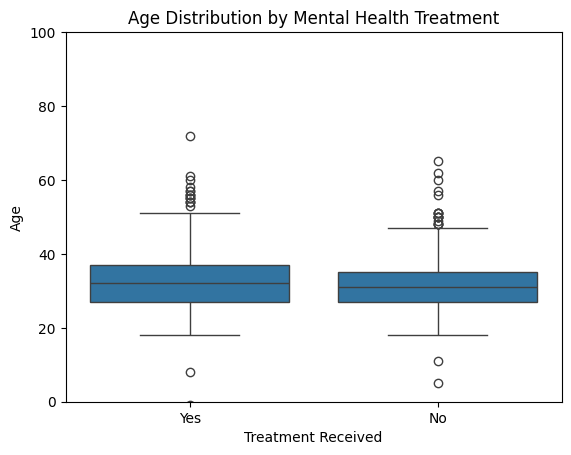

In [ ]:
# Remove rows with NaN values in 'Age' or 'treatment'
cleaned_data = datos.dropna(subset=['Age', 'treatment'])

# To create the boxplot
plt.figure()
sns.boxplot(data=cleaned_data, x='treatment', y='Age')

# Set axis labels and title
plt.title('Age Distribution by Mental Health Treatment')
plt.xlabel('Treatment Received')
plt.ylabel('Age')

# Visualization
plt.ylim(0, 100)

plt.show()


The median age for those that have received treatment and those that haven't is quite similar, however, we can see that there's a greater spread of ages in the group of those that have received mental health treatment than i the one of those that haven't. Similarly, the whiskers of the box that represents those who have received mental health treatment are longer, meaning that there is a larger variation in age present in thsi group. Lastly, we can see that there are a lot of outliers present in both groups.


---



### **Boxplots for Age by Gender**
We are comparing the age distribution between the different genders available in the dataset.

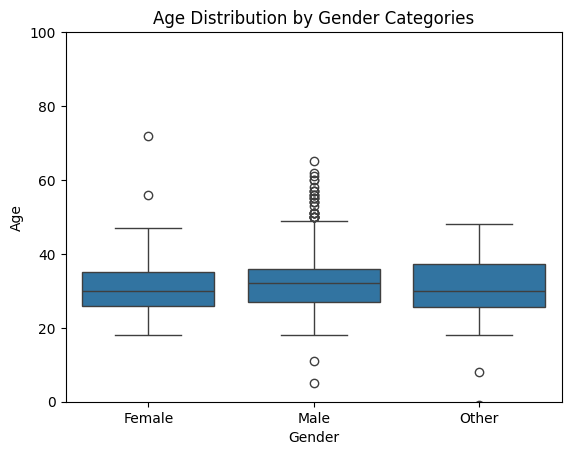

In [14]:
# Normalizing gender entries
def clean_gender(gender):
    gender = gender.strip().lower()
    if gender in ['Male', 'male', 'm', 'man', 'cis male', 'malr', 'mail', 'cis man']:
        return 'Male'
    elif gender in ['Female','female', 'f', 'woman', 'cis female', 'femake', 'cis-female/femme']:
        return 'Female'
    elif 'trans' in gender or 'non-binary' in gender or 'nb' in gender:
        return 'Other'
    else:
        return 'Other'

cleaned_data['gender_cleaned'] = cleaned_data['Gender'].apply(clean_gender)

# Boxplot
plt.figure()
sns.boxplot(data=cleaned_data, x='gender_cleaned', y='Age')
plt.title('Age Distribution by Gender Categories')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.ylim(0, 100)
plt.show()

From this boxplot we can see that the majority of people polled belong to the same age group, regardless of gender. We had to clean the gender entries in the dataset since there were a lot of different answers that made our boxplot quite cluttered. The spread of the ages is wider in the "Other" category, although this is possibly due to fewer data points and the outliers are way more visible in the "Male" and "Female" columns.


---


### **Histogram for Age Distribution**

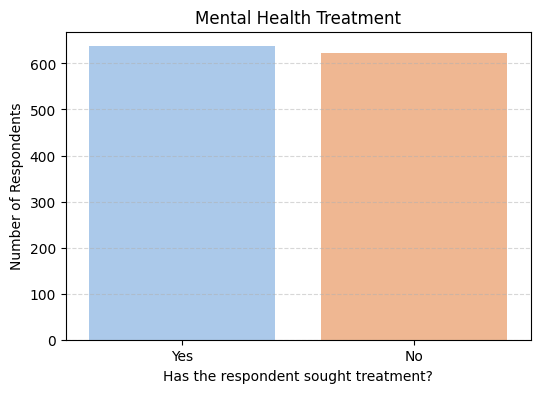

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(data=cleaned_data, x='treatment', hue='treatment', palette='pastel', legend=False)

plt.title('Mental Health Treatment')
plt.xlabel('Has the respondent sought treatment?')
plt.ylabel('Number of Respondents')



plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


As we can see from the histogram the respondents are equally split between those who have sought mental health treatment and those who haven't. This suggests that there is no strong skew in the tech industry in terms of seeking or not seeking mental health treatment.


---

### **Correlation**

In [30]:
# Filtrar edades razonables y crear copia segura
datos_clean = datos[(datos['Age'] >= 10) & (datos['Age'] <= 100)].copy()

# Convertir columnas ordinales a numéricas (puedes agregar más si lo deseas)
if 'leave' in datos_clean.columns:
    datos_clean['leave_num'] = datos_clean['leave'].map({
        'Very easy': 1,
        'Somewhat easy': 2,
        'Neither easy nor difficult': 3,
        'Somewhat difficult': 4,
        'Very difficult': 5
    })

if 'care_options' in datos_clean.columns:
    datos_clean['care_options_num'] = datos_clean['care_options'].map({
        'Yes': 1, 'Not sure': 2, 'No': 3
    })

if 'benefits' in datos_clean.columns:
    datos_clean['benefits_num'] = datos_clean['benefits'].map({
        'Yes': 1, 'Don’t know': 2, 'No': 3
    })

# Seleccionar solo columnas numéricas
numerical_cols = datos_clean.select_dtypes(include=['int64', 'float64'])

# Calcular y mostrar matriz de correlación
correlation_matrix = numerical_cols.corr()

print("Matriz de correlación entre variables numéricas:")
print(correlation_matrix)

Matriz de correlación entre variables numéricas:
                       Age  leave_num  care_options_num  benefits_num
Age               1.000000   0.068077         -0.105241     -0.131962
leave_num         0.068077   1.000000          0.022879      0.229170
care_options_num -0.105241   0.022879          1.000000      0.316053
benefits_num     -0.131962   0.229170          0.316053      1.000000


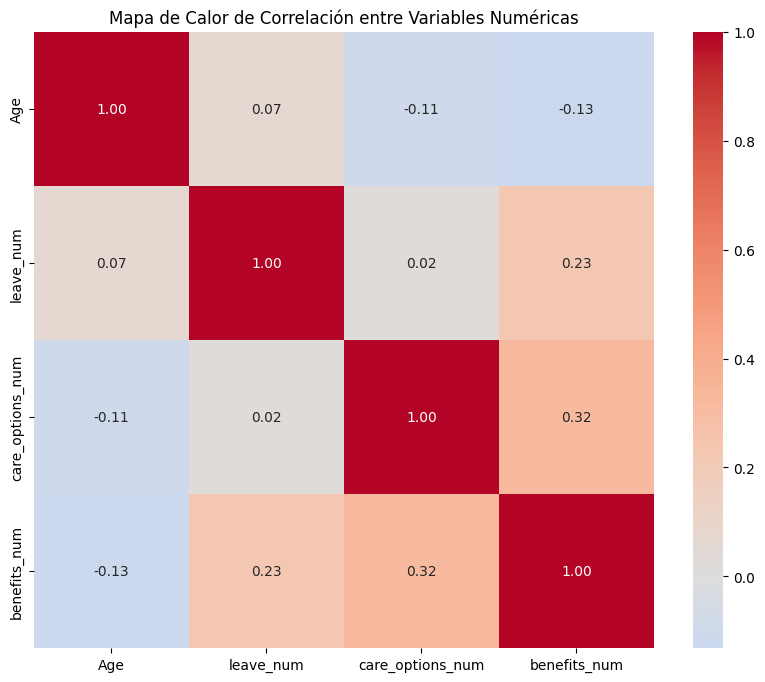

In [31]:
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")

# Título del gráfico
plt.title("Mapa de Calor de Correlación entre Variables Numéricas")

# Mostrar el gráfico
plt.show()


The correlation showed in the heatmap show that there's not a high correlation between the variables.



---


## **Conclusion**

Something interesting that I found in this dataset is the negative correlation between the age of the respondents and their perception of if they have access to mental health resources in the workspace. While we could expect that the personnel with more experience would have more access or would be better informed about these resources, the data shows the opposite, younger employees report more access to mental health resources than their seniors.




---


